# 🚢 Titanic EDA Project

In this project, we perform Exploratory Data Analysis (EDA) on the Titanic dataset to understand factors affecting passenger survival.  
We'll visualize distributions, clean the data, and uncover insights using Python libraries like Pandas, Seaborn, and Matplotlib.


Project Done By:- MOHAMMED RAQIB.


### 📥 Step 1: Import Libraries

We'll start by importing all the necessary Python libraries for data handling and visualization.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


### 📊 Step 2: Load the Titanic Dataset

We’ll load the Titanic dataset directly from Seaborn’s built-in datasets for convenience.


In [3]:

df = sns.load_dataset('titanic')

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 🧠 Step 3: Understand the Data Structure

Let’s explore the dataset to understand the columns, data types, and look for missing values.


In [4]:

df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 📈 Step 4: Basic Statistical Summary

We'll check summary statistics to understand the distribution and range of numerical features.


In [17]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


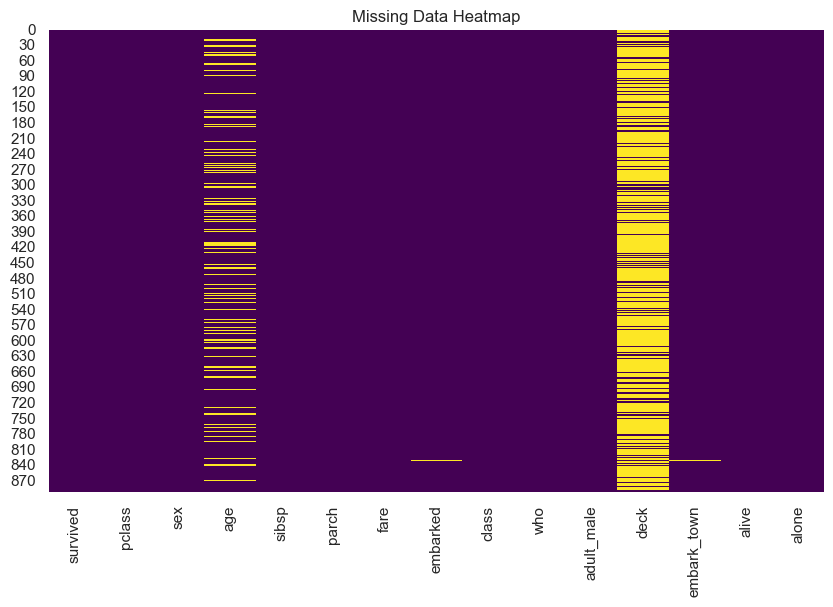

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


### 📘 Step 5: Check for Missing Values

We check which columns have missing (null) values to decide how to handle them later. This is important for data cleaning and model performance.


In [18]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

### 📘 Step 6: Visualize Missing Data

Using `seaborn.heatmap`, we visualize missing values across the dataset. This helps identify patterns in missing data.


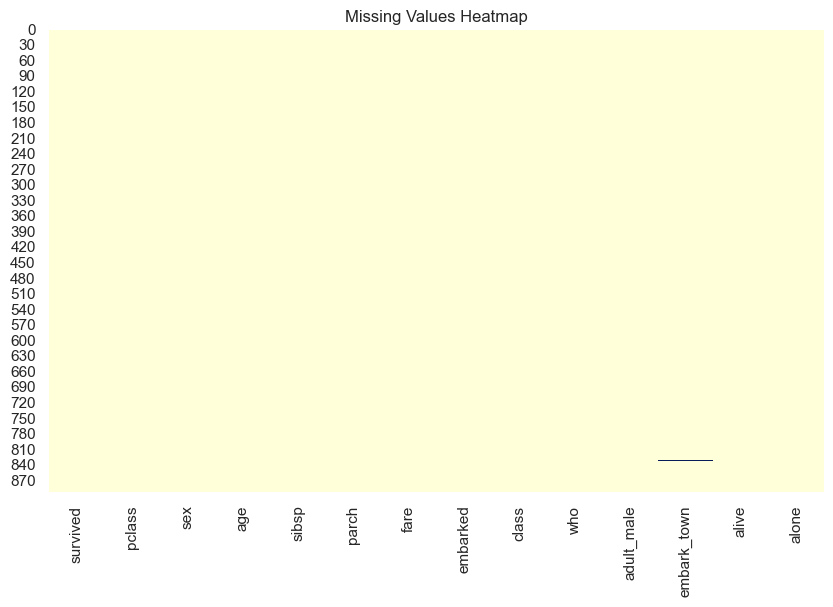

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

### 📘 Step 7: Clean Missing Data (Updated)

To ensure compatibility with future versions of pandas and avoid chained assignment warnings:
- We directly assign the result of `fillna()` to the DataFrame columns.


In [22]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

### 📘 Step 8: Visualize Survival by Passenger Class

This shows how survival varied across different ticket classes. First-class passengers had a higher survival rate historically.


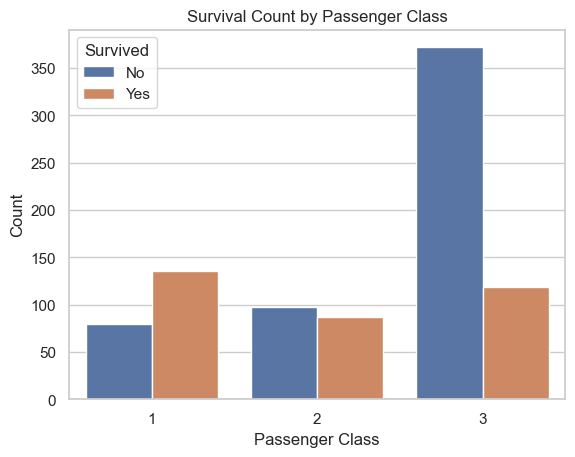

In [24]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


### 🔢 Step 10: Encode Categorical Features

Machine learning models can't handle categorical text data directly. So we convert the `sex` and `embarked` columns into numeric format using one-hot encoding. This creates separate binary columns for each category.


In [27]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

### 📊 Step 11: Split Data into Features and Target

Now, we separate the dataset into:
- **Features (`X`)**: All columns used to predict
- **Target (`y`)**: The column we want to predict (`survived`)


In [28]:
X = df.drop('survived', axis=1)
y = df['survived']


### ✂️ Step 12: Train-Test Split

We divide the data into training and testing sets using `train_test_split`. This allows us to train the model on one portion of the data and test its performance on another.


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🤖 Step 13: Build and Train the Logistic Regression Model

Logistic Regression is a good starting point for binary classification problems like survival prediction. We train the model using the training data.


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


ValueError: Cannot cast object dtype to float64

In [31]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 📊 Step 15: Evaluate the Logistic Regression Model

After training the model, we evaluate its performance using metrics such as accuracy, confusion matrix, and classification report.


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0
Confusion Matrix:
 [[105   0]
 [  0  74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

